Problem Statement
Beta Bank customers are leaving: little by little, chipping away every month. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on
clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1
score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.
1. Download and prepare the data. Explain the procedure.
2. Examine the balance of classes. Train the model without taking into account the
imbalance. Briefly describe your findings.
3. Improve the quality of the model. Make sure you use at least two approaches to
fixing class imbalance. Use the training set to pick the best parameters. Train
different models on training and validation sets. Find the best one. Briefly
describe your findings.
4. Perform the final testing.


In [14]:
#Downloading and preparing the data
import pandas as pd
beta_df = pd.read_csv('https://bit.ly/2XZK7Bo')
beta_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [15]:
#Dropping duplicates and missing data
beta_df = beta_df.drop_duplicates()

#missing data
total = beta_df.isnull().sum().sort_values(ascending=False)
percent = (beta_df.isnull().sum()/beta_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Tenure,909,0.0909
RowNumber,0,0.0000
CustomerId,0,0.0000
Surname,0,0.0000
CreditScore,0,0.0000
Geography,0,0.0000
Gender,0,0.0000
Age,0,0.0000
Balance,0,0.0000
NumOfProducts,0,0.0000


In [16]:
beta_df.dropna(axis=0, inplace=True)
beta_df.shape

(9091, 14)

In [17]:
#Dropping missing values , these account for 9%

total = beta_df.isnull().sum().sort_values(ascending=False)
percent = (beta_df.isnull().sum()/beta_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [19]:
#dropping the surname, customer ID and row number columns, these are not important in determining of a customer will stay or not

# Remove two columns name is 'C' and 'D'
beta_df.drop(['RowNumber', 'CustomerId','Surname'], axis = 1,inplace=True)
beta_df.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [20]:
#Label Encoding for gender and Geography columns

#preprocessing
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
beta_df.Geography=le.fit_transform(beta_df.Geography)
beta_df.Gender=le.fit_transform(beta_df.Gender)

beta_df.head(5)





,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [21]:
beta_df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,0.746783,0.547135,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,0.826879,0.497801,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,1.000000,1.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


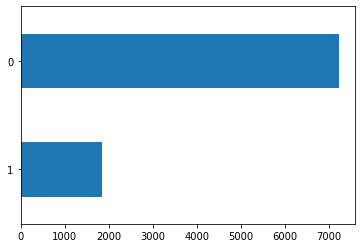

In [23]:
#Visual representation of the values in the exit column
beta_df.Exited.value_counts().sort_values().plot(kind = 'barh')

In [22]:
#Training the model
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

target = beta_df['Exited']
features = beta_df.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.008733624454148471


In [ ]:
#F1 score of 0.0087 obtained before balancing the class weight, as per the above visual representation, the low F1 score can be attributed to the imbalance between the number of exited customers and those who didnt exit

In [25]:
#F1_score after balancing class weight
model = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1_Balanaced_class weight:', f1_score(target_valid, predicted_valid))

F1_Balanaced_class weight: 0.4486525855790241


In [ ]:
#THe F1 Score improved significantly to 44% after balancing the weights

In [26]:
# Checking the distribution:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(5415, 10)
(1403, 10)
(5415,)
(1403,)


In [31]:
#UPSAMPLING
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

repeat = 5
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)

(12430, 10)
(12430,)
